In [1]:
##mouting the google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
##defining the path

csv_path='/content/drive/MyDrive/IRMAI/Loan_default.csv'

In [3]:
##importing the dataset

import pandas as pd
df = pd.read_csv(csv_path)


In [5]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [4]:
## knowing the columns

df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [6]:
##drop thrloan id because no use of it

df=df.drop(columns=['LoanID'],axis=1)

In [7]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [8]:
##knwoing the unique values
df['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [9]:
##Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

education_order = [["High School", "Bachelor's", "Master's", "PhD"]]  # Must be a list of lists

# Apply OrdinalEncoder
order_Encoder = OrdinalEncoder(categories=education_order)
df[['Education']] = order_Encoder.fit_transform(df[['Education']])

df


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1.0,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,0.0,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,0.0,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,0.0,Part-time,Single,Yes,Yes,Other,No,0


In [10]:
df['EmploymentType'].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [11]:
employment_order=['Unemployed', 'Self-employed', 'Part-time','Full-time']

order_Encoder=OrdinalEncoder(categories=[employment_order])
df[['EmploymentType']]=order_Encoder.fit_transform(df[['EmploymentType']])
df


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,3.0,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,3.0,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,0.0,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,3.0,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,0.0,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1.0,3.0,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,0.0,2.0,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,0.0,1.0,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,0.0,2.0,Single,Yes,Yes,Other,No,0


In [12]:
df['MaritalStatus'].unique()

array(['Divorced', 'Married', 'Single'], dtype=object)

In [13]:
from sklearn.preprocessing import OrdinalEncoder

m_Status_Order=['Divorced','Married','Single']
ordinal_Encoder=OrdinalEncoder(categories=[m_Status_Order])
df[['MaritalStatus']]=ordinal_Encoder.fit_transform(df[['MaritalStatus']])
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,3.0,0.0,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,3.0,1.0,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,0.0,0.0,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,3.0,1.0,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,0.0,0.0,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1.0,3.0,1.0,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,0.0,2.0,0.0,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,0.0,1.0,1.0,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,0.0,2.0,2.0,Yes,Yes,Other,No,0


In [14]:
df['LoanPurpose'].unique()

array(['Other', 'Auto', 'Business', 'Home', 'Education'], dtype=object)

In [15]:
loan_order=['Other', 'Business','Auto', 'Home', 'Education']
ordinal_Encoder=OrdinalEncoder(categories=[loan_order])
df[['LoanPurpose']]=ordinal_Encoder.fit_transform(df[['LoanPurpose']])
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,3.0,0.0,Yes,Yes,0.0,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,3.0,1.0,No,No,0.0,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,0.0,0.0,Yes,Yes,2.0,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,3.0,1.0,No,No,1.0,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,0.0,0.0,No,Yes,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1.0,3.0,1.0,No,No,0.0,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,0.0,2.0,0.0,No,No,3.0,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,0.0,1.0,1.0,Yes,Yes,2.0,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,0.0,2.0,2.0,Yes,Yes,0.0,No,0


In [19]:
##Label Encoding

from sklearn.preprocessing import LabelEncoder
label_Encoder=LabelEncoder()
df['HasMortgage']=label_Encoder.fit_transform(df['HasMortgage'])
df


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,3.0,0.0,1,1,0.0,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,3.0,1.0,0,0,0.0,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,0.0,0.0,1,1,2.0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,3.0,1.0,0,0,1.0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,0.0,0.0,0,1,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1.0,3.0,1.0,0,0,0.0,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,0.0,2.0,0.0,0,0,3.0,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,0.0,1.0,1.0,1,1,2.0,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,0.0,2.0,2.0,1,1,0.0,0,0


In [20]:
label_Encoder=LabelEncoder()
df['HasDependents']=label_Encoder.fit_transform(df['HasDependents'])
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,3.0,0.0,1,1,0.0,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,3.0,1.0,0,0,0.0,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,0.0,0.0,1,1,2.0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,3.0,1.0,0,0,1.0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,0.0,0.0,0,1,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1.0,3.0,1.0,0,0,0.0,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,0.0,2.0,0.0,0,0,3.0,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,0.0,1.0,1.0,1,1,2.0,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,0.0,2.0,2.0,1,1,0.0,0,0


In [21]:
label_Encoder=LabelEncoder()
df['HasCoSigner']=label_Encoder.fit_transform(df['HasCoSigner'])
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,3.0,0.0,1,1,0.0,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,3.0,1.0,0,0,0.0,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,0.0,0.0,1,1,2.0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,3.0,1.0,0,0,1.0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,0.0,0.0,0,1,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1.0,3.0,1.0,0,0,0.0,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,0.0,2.0,0.0,0,0,3.0,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,0.0,1.0,1.0,1,1,2.0,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,0.0,2.0,2.0,1,1,0.0,0,0


In [22]:
numerical_values=['Age'	,'Income'	,'LoanAmount',	'CreditScore'	,'MonthsEmployed',	'NumCreditLines'	,'InterestRate'	,'LoanTerm'	,'DTIRatio'	,'Education']

In [24]:
##getting to know the skewness of the columns to see if the data is symetrically distibuted and not skewed to the left or right much

df[numerical_values].skew()

,0
Age,0.000698
Income,-0.000381
LoanAmount,-0.001827
CreditScore,0.004688
MonthsEmployed,-0.002142
NumCreditLines,-0.000278
InterestRate,0.004608
LoanTerm,-0.002178
DTIRatio,-0.001499
Education,0.006353


In [25]:
## feature engineering
df.isnull().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0
Education,0


In [26]:
df["Loan_to_Income"] = df["LoanAmount"] / df["Income"]
# df=df.drop(['LoanAmount','Income'],axis=1)

In [27]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan_to_Income
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,3.0,0.0,1,1,0.0,1,0,0.588262
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,3.0,1.0,0,0,0.0,1,0,2.467481
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,0.0,0.0,1,1,2.0,0,1,1.534154
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,3.0,1.0,0,0,1.0,0,0,1.412638
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,0.0,0.0,0,1,2.0,0,0,0.447179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1.0,3.0,1.0,0,0,0.0,0,0,5.547329
255343,32,51953,189899,511,14,2,11.55,24,0.21,0.0,2.0,0.0,0,0,3.0,0,1,3.655208
255344,56,84820,208294,597,70,3,5.29,60,0.50,0.0,1.0,1.0,1,1,2.0,1,0,2.455718
255345,42,85109,60575,809,40,1,20.90,48,0.44,0.0,2.0,2.0,1,1,0.0,0,0,0.711734


In [28]:
df["Loan_Payment"] = df["LoanAmount"] / df["LoanTerm"]
#df=df.drop(['LoanTerm','LoanAmount'],axis=1)
df


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan_to_Income,Loan_Payment
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,3.0,0.0,1,1,0.0,1,0,0.588262,1405.194444
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,3.0,1.0,0,0,0.0,1,0,2.467481,2074.000000
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,0.0,0.0,1,1,2.0,0,1,1.534154,5382.833333
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,3.0,1.0,0,0,1.0,0,0,1.412638,1866.625000
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,0.0,0.0,0,1,2.0,0,0,0.447179,190.395833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1.0,3.0,1.0,0,0,0.0,0,0,5.547329,17556.833333
255343,32,51953,189899,511,14,2,11.55,24,0.21,0.0,2.0,0.0,0,0,3.0,0,1,3.655208,7912.458333
255344,56,84820,208294,597,70,3,5.29,60,0.50,0.0,1.0,1.0,1,1,2.0,1,0,2.455718,3471.566667
255345,42,85109,60575,809,40,1,20.90,48,0.44,0.0,2.0,2.0,1,1,0.0,0,0,0.711734,1261.979167


In [29]:
df.skew()


,0
Age,0.000698
Income,-0.000381
LoanAmount,-0.001827
CreditScore,0.004688
MonthsEmployed,-0.002142
NumCreditLines,-0.000278
InterestRate,0.004608
LoanTerm,-0.002178
DTIRatio,-0.001499
Education,0.006353


In [30]:
df["CreditUtilization"] = df["LoanAmount"] / (df["NumCreditLines"] + 1)

In [ ]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan_to_Income,Loan_Payment,CreditUtilization
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,3.0,0.0,1,1,0.0,1,0,0.588262,1405.194444,10117.400000
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,3.0,1.0,0,0,0.0,1,0,2.467481,2074.000000,62220.000000
2,46,84208,129188,451,26,3,21.17,24,0.31,2.0,0.0,0.0,1,1,2.0,0,1,1.534154,5382.833333,32297.000000
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,3.0,1.0,0,0,1.0,0,0,1.412638,1866.625000,11199.750000
4,60,20437,9139,633,8,4,6.51,48,0.73,1.0,0.0,0.0,0,1,2.0,0,0,0.447179,190.395833,1827.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1.0,3.0,1.0,0,0,0.0,0,0,5.547329,17556.833333,42136.400000
255343,32,51953,189899,511,14,2,11.55,24,0.21,0.0,2.0,0.0,0,0,3.0,0,1,3.655208,7912.458333,63299.666667
255344,56,84820,208294,597,70,3,5.29,60,0.50,0.0,1.0,1.0,1,1,2.0,1,0,2.455718,3471.566667,52073.500000
255345,42,85109,60575,809,40,1,20.90,48,0.44,0.0,2.0,2.0,1,1,0.0,0,0,0.711734,1261.979167,30287.500000


In [33]:
##Droping values that are not needed now

df=df.drop(['LoanAmount','Income','LoanTerm'],axis=1)

KeyError: "['LoanAmount', 'Income', 'LoanTerm'] not found in axis"

In [34]:
df

,Age,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan_to_Income,Loan_Payment,CreditUtilization
0,56,520,80,4,15.23,0.44,1.0,3.0,0.0,1,1,0.0,1,0,0.588262,1405.194444,10117.400000
1,69,458,15,1,4.81,0.68,2.0,3.0,1.0,0,0,0.0,1,0,2.467481,2074.000000,62220.000000
2,46,451,26,3,21.17,0.31,2.0,0.0,0.0,1,1,2.0,0,1,1.534154,5382.833333,32297.000000
3,32,743,0,3,7.07,0.23,0.0,3.0,1.0,0,0,1.0,0,0,1.412638,1866.625000,11199.750000
4,60,633,8,4,6.51,0.73,1.0,0.0,0.0,0,1,2.0,0,0,0.447179,190.395833,1827.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,541,109,4,14.11,0.85,1.0,3.0,1.0,0,0,0.0,0,0,5.547329,17556.833333,42136.400000
255343,32,511,14,2,11.55,0.21,0.0,2.0,0.0,0,0,3.0,0,1,3.655208,7912.458333,63299.666667
255344,56,597,70,3,5.29,0.50,0.0,1.0,1.0,1,1,2.0,1,0,2.455718,3471.566667,52073.500000
255345,42,809,40,1,20.90,0.44,0.0,2.0,2.0,1,1,0.0,0,0,0.711734,1261.979167,30287.500000


<Axes: >

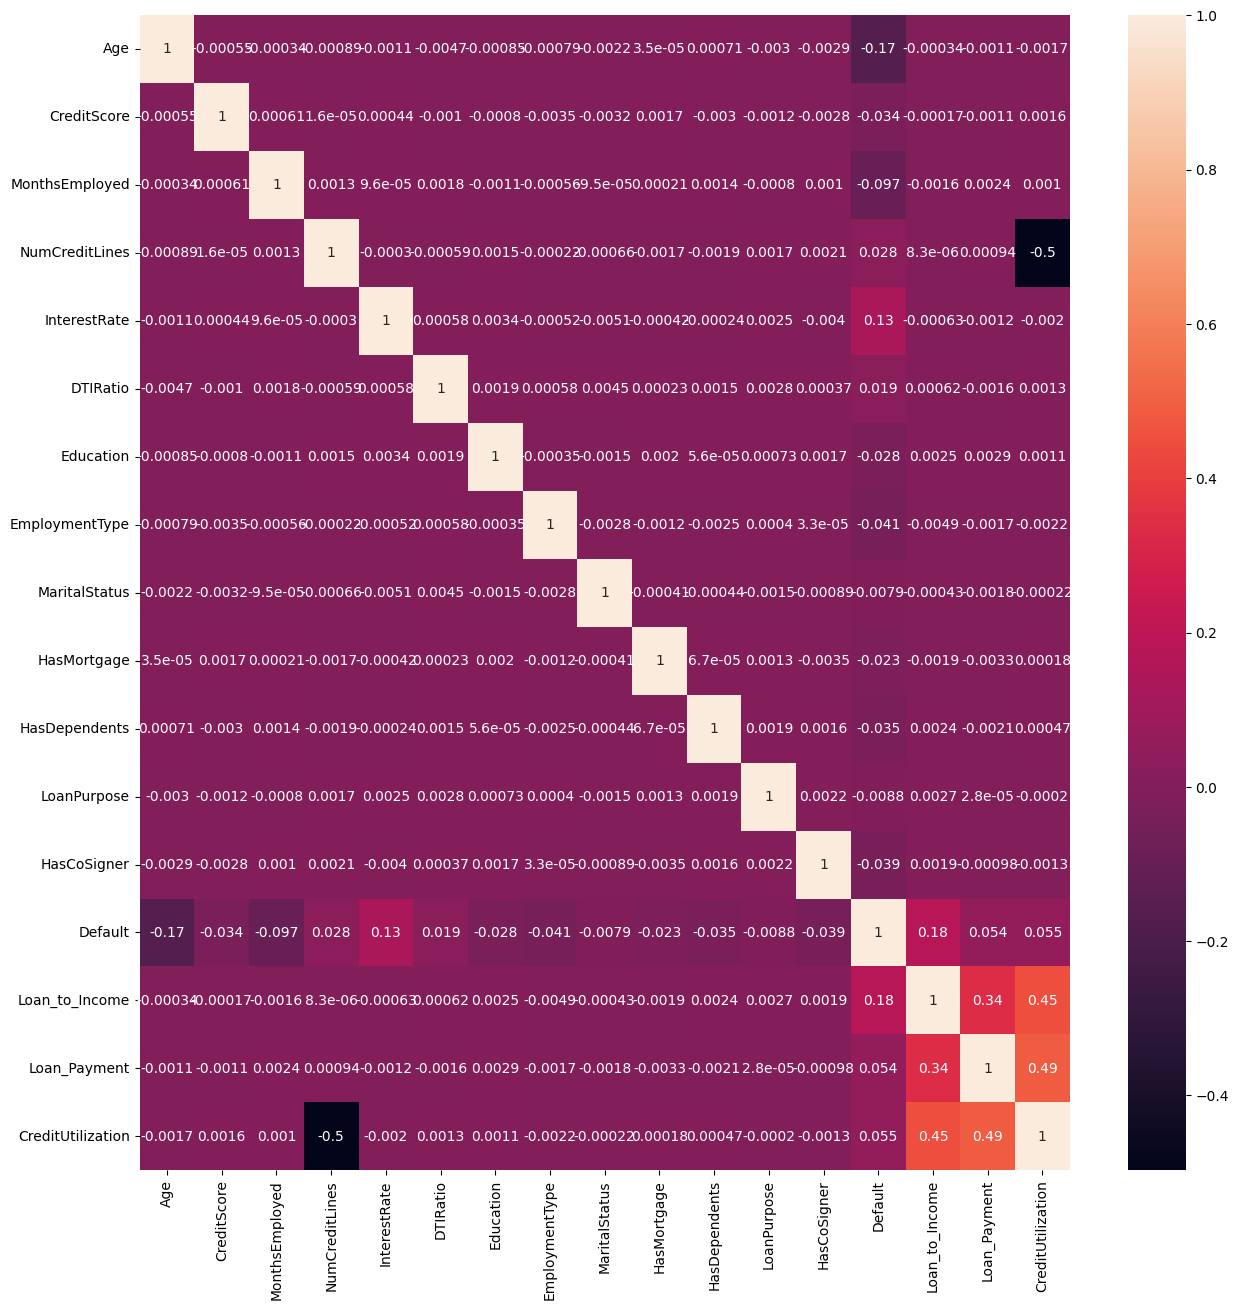

In [36]:
## correlation map for seeing how columns are related to each other
import seaborn as sns
import matplotlib.pyplot as plt

corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

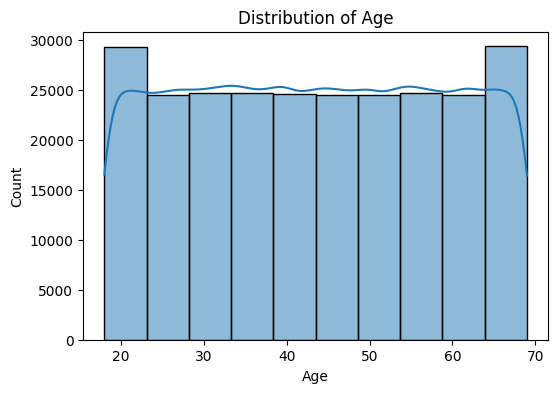

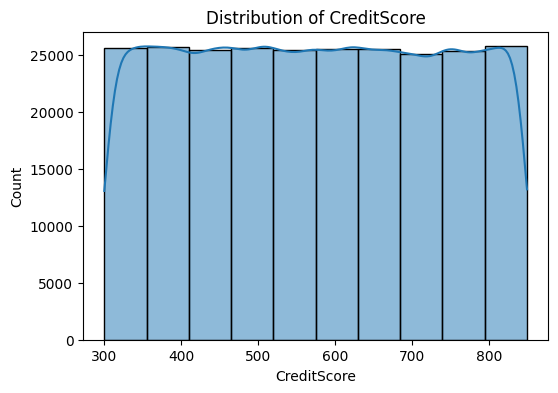

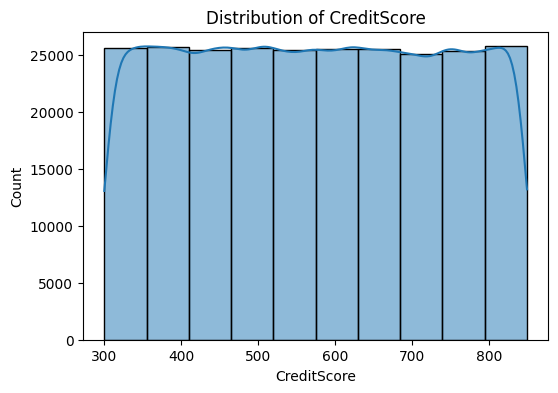

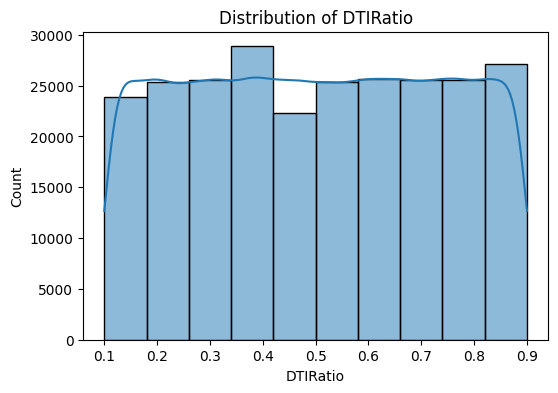

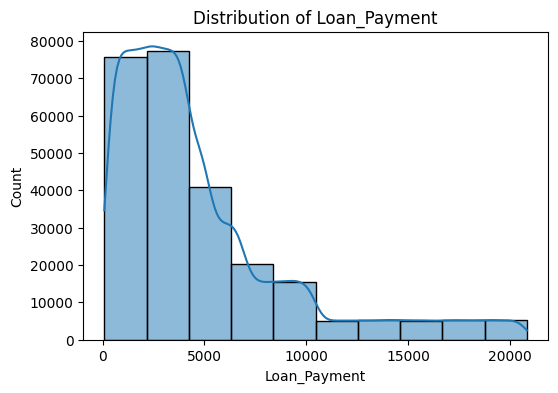

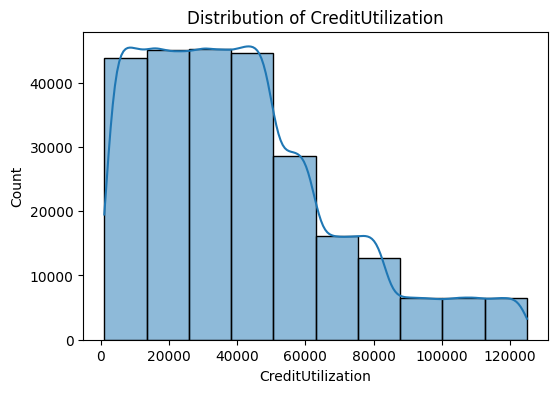

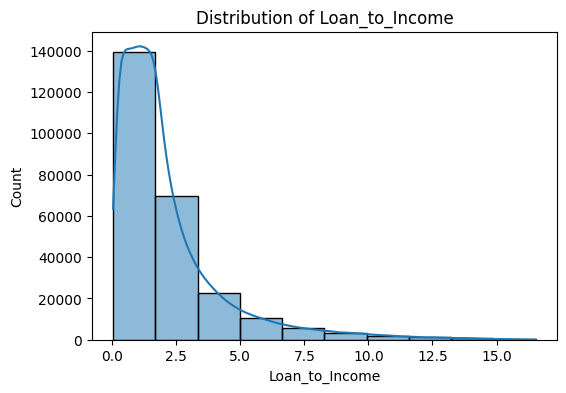

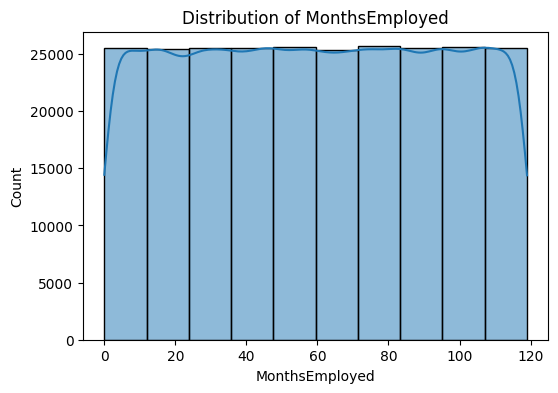

In [37]:
##histogram plot of some of the columns

import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["Age", "CreditScore", "CreditScore", "DTIRatio","Loan_Payment","CreditUtilization","Loan_to_Income","MonthsEmployed"]
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Distribution of {col}")

    plt.show()
